## Visualization of GD trajectories

The following is means to be a fun and hopefully informative visualization of GD. No need to carefully understand the code.

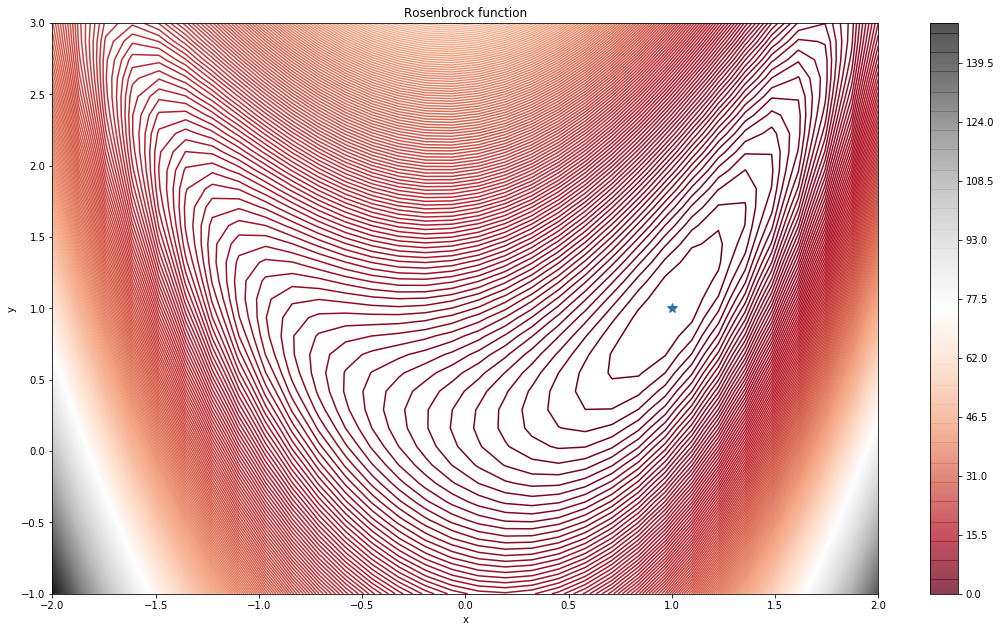

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

def rosenbrock(x,y):
    return (1-x)**2+5*(y-x**2)**2 + 1.2*(x-1)**2 + 1.2*(y-1)**2


N = 32
xlist = np.linspace(-2.0, 2.0, N)
ylist = np.linspace(-1.0, 3.0, N)
X, Y = np.meshgrid(xlist, ylist)
# Z = np.sqrt(X**2 + Y**2)
Z = rosenbrock(X,Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 300, cmap='RdGy')
cbar = fig.colorbar(CS)
ax.plot(1,1,'*',color='#2774AE',markersize=10)


plt.title('Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
fig.set_size_inches(18.5, 10.5)
plt.show()

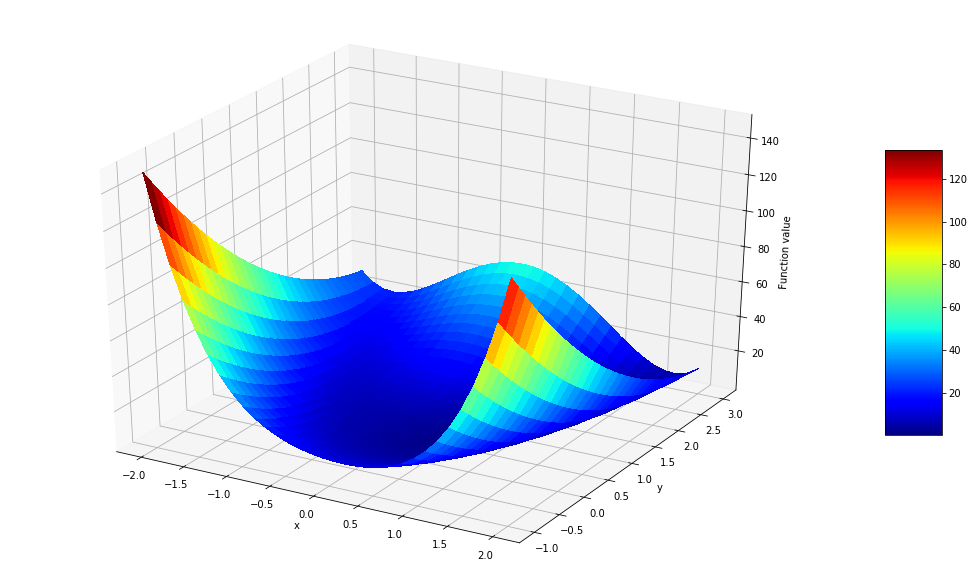

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive

#In Spyder, you can use %matplotlib qt to create interactive window
def rosenbrock(x,y):
    return (1-x)**2+5*(y-x**2)**2 + 1.2*(x-1)**2 + 1.2*(y-1)**2

N = 32
X, Y = np.meshgrid(np.linspace(-2.0, 2.0, N), np.linspace(-1.0, 3.0, N))


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, rosenbrock(X,Y), rstride=1, cstride=1, cmap=cm.jet,
         linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function value')
fig.set_size_inches(18.5, 10.5)
plt.show()

Execute the following code in Spyder (not in Jupyter)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive

import matplotlib.pyplot as plt
import numpy as np


def rosenbrock(x,y):
    return (1-x)**2+5*(y-x**2)**2 + 1.2*(x-1)**2 + 1.2*(y-1)**2
def rosen_grad(x,y):
    return np.array((2*(x-1)+5*2*(x**2-y)*2*x+2.4*(x-1),2*(y-x**2)+2.4*(y-1)))

N = 32
xlist = np.linspace(-2.0, 2.0, N)
ylist = np.linspace(-1.0, 3.0, N)
X, Y = np.meshgrid(xlist, ylist)
Z = rosenbrock(X,Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 300, cmap='RdGy')
cbar = fig.colorbar(CS)
ax.plot(1,1,'*',color='#2774AE',markersize=10)

plt.title('Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
fig.set_size_inches(18.5, 10.5)


M=100
z_curr = np.array((-1,-0.5))
#z_curr = np.array((1,2.5))
plt.plot(z_curr[0], z_curr[1], 'ko')

for _ in range(M):
    step_size = 0.001
    #You can unpack numpy arrays with *
    while (rosenbrock(*(z_curr - step_size*rosen_grad(*z_curr))) >= rosenbrock(*z_curr)):
        step_size = step_size / 2;
    z_curr = z_curr - step_size*rosen_grad(*z_curr)
    plt.plot(z_curr[0], z_curr[1], 'ko')
    #%matplotlib qt
#     plt.pause(0.01) #Add time delay. Use in Spyder. doesn't work in Jupyter.

plt.show()

## Basics of GD and SGD

For the least squares problem
$$
\begin{array}{ll}
\underset{\theta\in \mathbb{R}^p}{\mbox{minimize}}&\frac{1}{2N}\|X\theta-Y\|^2
\end{array}
$$
where $X\in \mathbb{R}^{N\times p}$ and $Y\in \mathbb{R}^N$.
GD becomes
$$
\theta^{k+1}=\theta^k-\frac{\alpha}{N} X^T(X\theta^k-Y)
$$

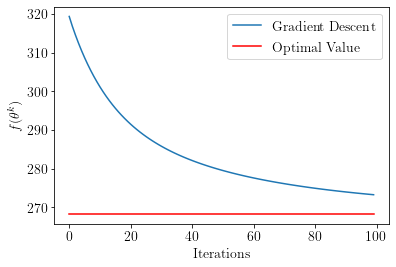

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N, p = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(N,N))
V,_ = np.linalg.qr(np.random.randn(p,p))
sig = np.random.rand(p)+0.2
sig[1] = 5
X = U[:,:p]@np.diag(sig)@V
Y = np.random.randn(N)

theta = np.zeros(p)
alpha = 10  # 10 is roughly the best value

K = 100
f_val = []
for _ in range(K):
    theta -= (alpha/N)*X.T@(X@theta-Y)
    f_val.append(np.linalg.norm(X@theta-Y)**2)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(K)),f_val, label = "Gradient Descent")
plt.plot(list(range(K)),np.linalg.norm(X@np.linalg.inv(X.T@X)@X.T@Y-Y)**2*np.ones(K), color = "red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

For the least squares problem
$$
\begin{array}{ll}
\underset{\theta \in \mathbb{R}^p}{\mbox{minimize}}&\frac{1}{2N}\sum^N_{i=1}(X_i^\intercal\theta-Y_i)^2
\end{array}
$$
SGD becomes
$$
i(k)\sim \mathrm{Uniform}(\{1,\dots,N\})\\
\theta^{k+1}=\theta^k-\alpha (X_{i(k)}^\intercal \theta^k-Y_{i(k)})X_{i(k)}
$$

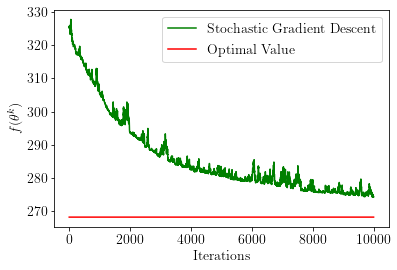

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N, p = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(N,N))
V,_ = np.linalg.qr(np.random.randn(p,p))
sig = np.random.rand(p)+0.2
sig[1] = 5
X = U[:,:p]@np.diag(sig)@V
Y = np.random.randn(N)

theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha*(X[ind,:]@theta-Y[ind])*X[ind,:]
    f_val.append(np.linalg.norm(X@theta-Y)**2)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(K)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.plot(list(range(K)),np.linalg.norm(X@np.linalg.inv(X.T@X)@X.T@Y-Y)**2*np.ones(K), color = "red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

Comparison of SGD vs GD. We compare epoch by epoch.

At early stages, SGD is better than GD. Eventually, GD beats SGD. (In this example, GD catches up at about N=300 epochs.)

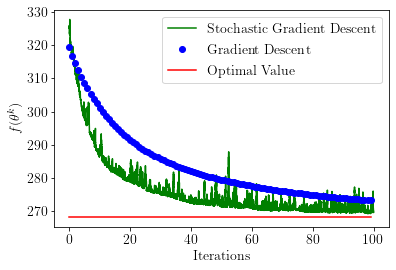

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N, p = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(N,N))
V,_ = np.linalg.qr(np.random.randn(p,p))
sig = np.random.rand(p)+0.2
sig[1] = 5
X = U[:,:p]@np.diag(sig)@V
Y = np.random.randn(N)

K = 100  # number of epochs

theta = np.zeros(p)
alpha = 10
f_val_GD = []
for _ in range(K):
    theta -= (alpha/N)*X.T@(X@theta-Y)
    f_val_GD.append(np.linalg.norm(X@theta-Y)**2)


theta = np.zeros(p)
alpha = 0.1
f_val_SGD = []
for _ in range(K*N):
    ind = np.random.randint(N)
    theta -= alpha*(X[ind,:]@theta-Y[ind])*X[ind,:]
    f_val_SGD.append(np.linalg.norm(X@theta-Y)**2)
    

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(np.arange(K*N)/N,f_val_SGD, color = "green", label = "Stochastic Gradient Descent")
plt.plot(np.arange(0,K*N,N)/N,f_val_GD, color = "blue", linestyle = "", marker = "o", label = "Gradient Descent")
plt.plot(list(range(K)),np.linalg.norm(X@np.linalg.inv(X.T@X)@X.T@Y-Y)**2*np.ones(K), color = "red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

In [47]:
np.random.permutation(np.arange(10))

array([7, 2, 5, 1, 8, 6, 3, 4, 9, 0])

For the least squares problem
$$
\begin{array}{ll}
\underset{\theta\in \mathbb{R}^p}{\mbox{minimize}}&\frac{1}{2N}\|X\theta-Y\|^2
\end{array}
$$
where $X\in \mathbb{R}^{N\times p}$ and $Y\in \mathbb{R}^N$.


SGD vs Mini-batch SGD with replacement vs Mini-batch SGD without replacement

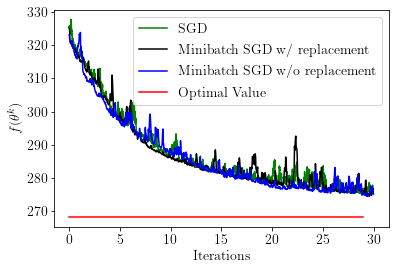

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N, p = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(N,N))
V,_ = np.linalg.qr(np.random.randn(p,p))
sig = np.random.rand(p)+0.2
sig[1] = 5
X = U[:,:p]@np.diag(sig)@V
Y = np.random.randn(N)

K = 30  #number of epochs

theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value
f_val_SGD = []
for _ in range(K*N):
    ind = np.random.randint(N)
    theta -= alpha*(X[ind,:]@theta-Y[ind])*X[ind,:]
    f_val_SGD.append(np.linalg.norm(X@theta-Y)**2)
    

B = 10    #size of minibatch

theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value
f_val_MB = []
for _ in range(K*N//B):  # // is integer division
    grad = np.zeros(p)
    for _ in range(B):
        ind = np.random.randint(N)
        grad += (X[ind,:]@theta-Y[ind])*X[ind,:]
    theta -= alpha*grad
    f_val_MB.append(np.linalg.norm(X@theta-Y)**2)

    
theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value
f_val_RP = []
for _ in range(K*N//B):  # // is integer division
    grad = np.zeros(p)
    perm = np.random.permutation(np.arange(N))
    for b in range(B):
        ind = perm[b]
        grad += (X[ind,:]@theta-Y[ind])*X[ind,:]
    theta -= alpha*grad
    f_val_RP.append(np.linalg.norm(X@theta-Y)**2)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(np.arange(K*N)/N,f_val_SGD, color = "green", label = "SGD")
plt.plot(np.arange(K*N//B)*B/N,f_val_MB, color = "black", label = "Minibatch SGD w/ replacement")
plt.plot(np.arange(K*N//B)*B/N,f_val_RP, color = "blue", label = "Minibatch SGD w/o replacement")
plt.plot(list(range(K)),np.linalg.norm(X@np.linalg.inv(X.T@X)@X.T@Y-Y)**2*np.ones(K), color = "red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

SGD vs Cyclic SGD vs Shuffled cyclic SGD

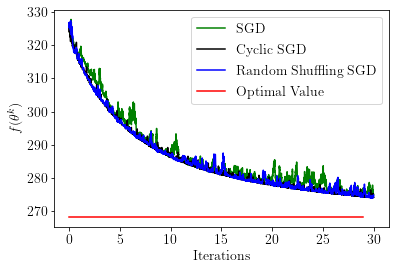

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N, p = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(N,N))
V,_ = np.linalg.qr(np.random.randn(p,p))
sig = np.random.rand(p)+0.2
sig[1] = 5
X = U[:,:p]@np.diag(sig)@V
Y = np.random.randn(N)

K = 30  #number of epochs

theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value
f_val_SGD = []
for _ in range(K*N):
    ind = np.random.randint(N)
    theta -= alpha*(X[ind,:]@theta-Y[ind])*X[ind,:]
    f_val_SGD.append(np.linalg.norm(X@theta-Y)**2)
    

theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value
f_val_cyclic = []
for j in range(K*N):
    ind = j % N
    theta -= alpha*(X[ind,:]@theta-Y[ind])*X[ind,:]
    f_val_cyclic.append(np.linalg.norm(X@theta-Y)**2)

    
theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value
f_val_shuffle_cyclic = []
for j in range(K*N):
    if j%N == 0:  # reshuffle every epoch
        perm = np.random.permutation(np.arange(N))
    ind = perm[j%N]
    theta -= alpha*(X[ind,:]@theta-Y[ind])*X[ind,:]
    f_val_shuffle_cyclic.append(np.linalg.norm(X@theta-Y)**2)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(np.arange(K*N)/N,f_val_SGD, color = "green", label = "SGD")
plt.plot(np.arange(K*N)/N,f_val_cyclic, color = "black", label = "Cyclic SGD")
plt.plot(np.arange(K*N)/N,f_val_shuffle_cyclic, color = "blue", label = "Random Shuffling SGD")
plt.plot(list(range(K)),np.linalg.norm(X@np.linalg.inv(X.T@X)@X.T@Y-Y)**2*np.ones(K), color = "red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()